### Lab7: Introduction to Statistical Machine Learning Linear Regression
#### By Mohan Bakshi

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from IPython.display import display

In [13]:
# Importing dataset

df = pd.read_csv('Advertising.csv', usecols = ['TV', 'radio', 'newspaper', 'sales'])
display(df.shape)
display(df.head(10))

(200, 4)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


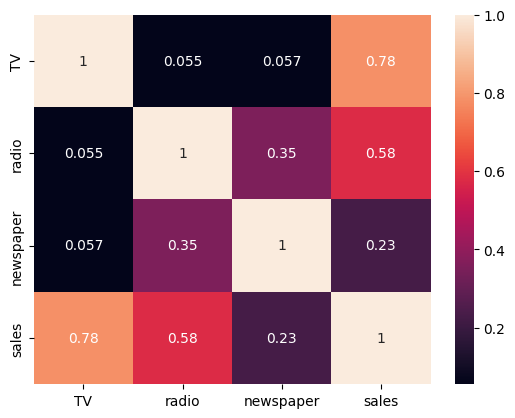

In [16]:
# Plotting linear correlations between variables from the dataset

corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot = True)
plt.show()

__Observations from Correlation Heatmap Analysis__

The heatmap illustrates the relationships between the variables in our Advertising dataset. Each cell indicates the correlation coefficient (Pearson's r) between two variables, which ranges from -1 to 1. The heatmap's darker colour (black) represents weak correlations(0). However, the lighter colour (Beige) indicates a strong relationship (1). Furthermore, colours such as Dark Purple, Purple, and Red represent the moderate association between the variables.

__Correlation Strength:__ We find high positive correlations (r > 0.7) between TV and sales, showing that buyers prefer to buy TV over radio and newspapers. However, Radio depicts a moderate relation with the sales. On the other hand, Newspaper shows a weak relationship towards the sales.

__Outliers and Unexpected Relationships:__ An unexpected finding is the weak correlation between Newspaper and Sales(0.23) and Newspaper and Radio(0.35).

In [23]:
# Implementing linear regression model

class LinearRegression:
    """Linear Regression Model using Least Squares Method"""
    def __init__(self):
        self.W = None

    def fit(self, train_data, train_labels):
        """
        Traning function
        :param train_data: input training feature vectors
        :param train_labels: input training labels
        """
        X = np.vstack((np.ones(len(train_data)), train_data.T)).T
        Y = train_labels
        self.W  = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,Y))
        return self

    def predict(self, test_data):
        """
        Prediction function
        :param test_data: input feature vectors for predictions
        :return: predictions
        """
        Y = []
        # add the first 1 to each feature vector [1 x]
        X = np.vstack((np.ones(len(test_data)), test_data.T)).T
        for x in X:
            y = np.dot(x, self.W)
            Y.append(y)
        return Y

    @property
    def get_weights(self):
        return self.W
        
# Implementing evaluation metrics

def rmse(Y, Y_hat):
    """
    Calculate root mean squared error (RMSE) (lecture slide #19)
    :param Y: true labels
    :param Y_hat: predicted labels
    :return: rmse
    """
    return np.sqrt(np.sum(np.square(Y-Y_hat)/len(Y)))

def r2_score(Y, Y_hat):
    """
    Calculate R2 statistic metric (lecture slide #20)
    :param Y: true labels
    :param Y_hat: predicted labels
    :return: R2
    """
    RSS = np.sum(np.square(Y-Y_hat))
    Y_bar = np.mean(Y)
    TSS = np.sum(np.square(Y - Y_bar))
    R2 = 1 - RSS/TSS
    return R2


In [50]:
# Random split dataset for training sets and test sets (e.g., 80 + 20: 80% for training, 20% for testing)

train_df = df.sample(frac=0.80, random_state=2021)
test_df = df.drop(train_df.index)

X_train = train_df[['TV', 'radio', 'newspaper']].values
Y_train = train_df['sales'].values

X_test = test_df[['TV', 'radio', 'newspaper']].values
Y_test = test_df['sales'].values

# Training linear regression model with the training data

trained_lr_model = LinearRegression().fit(X_train, Y_train)
print(f"\n Trained linear Model: {trained_lr_model.get_weights}")

# Evaluate model performance with the seen training data

# predictions of train data
predicted_Y_train = trained_lr_model.predict(X_train)

# calculate rmse metric
rmse_train = rmse(Y_train, predicted_Y_train)
print(f"\n Root mean squared error for Training(RMSE): {rmse_train:.3F}")

# calculate r2 metric
r2_train = r2_score(Y_train, predicted_Y_train)
print(f"\n R2 statistic metric for Training :  {r2_train:.3F}")

# Evaluating model performance with the unseen testing data

# predictions of test data
predicted_Y_test = trained_lr_model.predict(X_test)

# calculate rmse metric
rmse_test = rmse(Y_test, predicted_Y_test)
print(f"\n Root mean squared error for Test (RMSE): {rmse_test:.3F}")

# calculate r2 metric
r2_test = r2_score(Y_test, predicted_Y_test)
print(f"\n R2 statistic metric for Test : {r2_test:.3F}")


 Trained linear Model: [3.05453992e+00 4.51282015e-02 1.85389693e-01 9.08288652e-04]

 Root mean squared error for Training(RMSE): 1.673

 R2 statistic metric for Training :  0.895

 Root mean squared error for Test (RMSE): 1.657

 R2 statistic metric for Test : 0.897


Here are observations based on the Training and Testing Performance:

1. **Model Coefficients**:
  
   The coefficients for the linear regression model on the training dataset are [3.05453992e+00, 4.51282015e-02, 1.85389693e-01, 9.08288652e-04]. These coefficients represent the weights assigned to each feature in the model.

2. **Training Performance**:
     
   - **Root Mean Squared Error (RMSE)**: The RMSE for the training dataset is approximately 1.673. RMSE measures the average deviation of predicted values from actual values, with lower values indicating better model performance.
     
   - **R2 Score**: The R2 statistic metric for the training dataset is 0.895, indicating that the model explains approximately 89.5% of the variance in the training data. A higher R2 score suggests a better fit of the model to the data.

3. **Testing Performance**:
   
   - **Root Mean Squared Error (RMSE)**: The RMSE for the testing dataset is approximately 1.657. This metric evaluates the model's performance on unseen data, with lower RMSE indicating better predictive accuracy.
     
   - **R2 Score**: The R2 statistic metric for the testing dataset is 0.897, indicating that the model works well on new, unseen data, accounting for around 89.7% of the variance. A high R2 value on the test set suggests that the model applies successfully.


Overall, the model looks to perform well on both the training and testing datasets, as indicated by low RMSE values and high R2 scores.